<a href="https://colab.research.google.com/github/Jems-Chawin/Machine-Learning-Lab/blob/main/Lab1/Lab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 1 - PART 2**
- Data Exploration, Cleansing, and Transform
- Remove variables with High Variable Correlation
- Remove Variables with High p-value according to Chi-square

### Import tools

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

## **1. Data Exploration**
Read the Data_example.csv files
<details>
<summary>
<font size="3" color="Yellow">
<b>Columns Information</b>
</font>
</summary>

</br>There are 25 variables:

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX**: Gender (M, F)
- **EDUCATION**: (graduate school, university, high school, others, unknown, unknown)
- **MARRIAGE**: Marital status (married, single, others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default**: Default payment (Y, N)

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.read_csv()`
</details>

In [ ]:
### START CODE HERE ###
df = pd.read_csv("Credit-Card-Defaulter-Prediction.csv")
### END CODE HERE ###

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Single,24,2.0,2.0,-1.0,-1.0,...,0.0,NaN,NaN,NaN,689.0,0.0,0.0,0.0,0.0,Y
1,2,120000,F,University,Single,26,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,NaN,2000.0,Y
2,3,90000,F,University,Single,34,0.0,NaN,NaN,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,N
3,4,50000,F,University,Single,37,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,N
4,5,50000,M,University,Married,57,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,NaN,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,N
29996,29997,150000,M,High School,Married,43,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,NaN,N
29997,29998,30000,M,University,Single,37,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Y
29998,29999,80000,M,High School,Married,41,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Y


Remove column `ID`.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.drop()`
</details>

In [ ]:
### START CODE HERE ###
df.drop(["ID"], axis=1, inplace=True)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- `
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')
`

</details>

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

#### Fill NA values
Before proceeding with filling missing values, it is crucial to comprehend the significance of each numerical column in the dataset. This understanding will guide the appropriate method for handling missing data in a way that aligns with the context and characteristics of each column.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fillna()`
- Please explore the statistical values for each column (mean, median, min, max, etc.). Careful about column 'PAY_X'.
</details>

In [ ]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,27772.000000,27643.000000,27590.000000,27493.000000,27508.000000,27582.000000,29734.000000,29643.000000,2.957000e+04,29552.000000,29440.000000,29379.000000,29206.000000,2.918700e+04,29099.000000,29040.000000,28953.000000,28923.000000
mean,167484.322667,35.485500,-0.018040,-0.145172,-0.180718,-0.240789,-0.290316,-0.316620,51681.574191,49771.354283,4.769681e+04,43918.803093,41078.193920,39693.414071,5817.551702,6.086097e+03,5387.485652,4985.616598,4972.943356,5409.711199
std,129747.661567,9.217904,1.168002,1.246519,1.246997,1.219297,1.180443,1.195964,73804.236703,71394.928254,6.961801e+04,64596.091009,61115.521282,59908.657894,16760.222771,2.333808e+04,17853.079395,15898.010884,15524.335412,18076.401807
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3840.500000,3366.000000,3.170000e+03,2688.000000,2195.750000,1604.000000,1084.250000,1.000000e+03,556.500000,390.000000,390.000000,326.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23020.500000,22063.000000,2.067050e+04,19411.500000,18620.000000,17824.000000,2219.500000,2.100000e+03,2000.000000,1600.000000,1690.000000,1600.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67855.750000,64875.500000,6.118675e+04,55716.250000,50950.250000,49912.500000,5100.000000,5.000000e+03,4790.000000,4220.000000,4280.000000,4200.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [ ]:
### START CODE HERE ###
for i in range(1,7):
  df[f"BILL_AMT{i}"].fillna(df[f"BILL_AMT{i}"].mean(), inplace=True)
  df[f"PAY_AMT{i}"].fillna(df[f"PAY_AMT{i}"].median(), inplace=True)
for i in range(7):
  if i == 1:
    continue
  df[f"PAY_{i}"].fillna(df[f"PAY_{i}"].median(), inplace=True)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>


```
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AMT4   30000 non-null  float64
 21  PAY_AMT5   30000 non-null  float64
 22  PAY_AMT6   30000 non-null  float64
 23  default    30000 non-null  object
dtypes: float64(18), int64(2), object(4)
memory usage: 5.5+ MB
```

</details>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

## **2. Remove variables with High Variable Correlation**

Calculate the correlation of the numerical columns.
$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$



<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Retrieve the numerical columns first, and then calculate the correlation.
- `.corr()`
</details>

In [ ]:
### START CODE HERE ###

correlation_matrix = df.corr()

### END CODE HERE ###

<ipython-input-165-0495bc728046>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

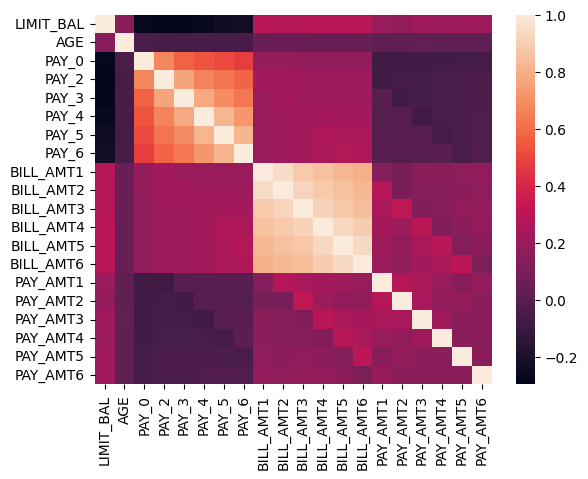

In [ ]:
sns.heatmap(correlation_matrix)

Extract the lower triangular part of the correlation matrix.
<details>
<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `np.tril()` migth be useful here.
</details>

In [ ]:
### START CODE HERE ###
lower = np.tril(correlation_matrix)
### END CODE HERE ###

<Axes: >

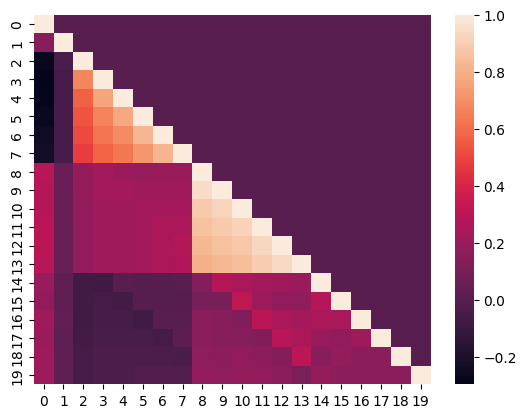

In [ ]:
sns.heatmap(lower)

Drop the input variables (columns) that have high correlation (too similar) > 0.6.
(high correlation = large similarity)

In [ ]:
### START CODE HERE ###
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)
df.drop(to_drop, axis=1, inplace=True)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

|             | LIMIT_BAL | AGE   | PAY_6 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 |
|-------------|-----------|-------|-------|-----------|----------|----------|----------|----------|----------|----------|
| count       | 30000.0   | 30000 | 30000 | 30000.0   | 30000    | 30000    | 30000    | 30000    | 30000    | 30000    |
| mean        | 167484.32 | 35.49 | -0.29 | 39693.41  | 5817.55  | 6086.10  | 5387.49  | 4985.62  | 4972.94  | 5409.71  |
| std         | 129747.66 | 9.22  | 1.15  | 59285.34  | 16536.93 | 23019.67 | 17582.93 | 15641.57 | 15251.02 | 17748.95 |
| min         | 10000.0   | 21    | -2.0  | -339603.0 | 0        | 0        | 0        | 0        | 0        | 0        |
| 25%         | 50000.0   | 28    | -1.0  | 1760.0    | 1125.0   | 1000.0   | 614.75   | 416.0    | 412.0    | 389.0    |
| 50%         | 140000.0  | 34    | 0.0   | 18480.5   | 2400.0   | 2200.5   | 2000.0   | 1770.5   | 1880.0   | 1800.0   |
| 75%         | 240000.0  | 41    | 0.0   | 49198.25  | 5700.0   | 5433.0   | 5000.0   | 4985.62  | 4972.94  | 5000.0   |
| max         | 1000000.0 | 79    | 8.0   | 961664.0  | 873552.0 | 1684259.0| 896040.0 | 621000.0 | 426529.0 | 528666.0 |

</details>

In [ ]:
df.describe()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,51681.574191,5722.323267,5.978074e+03,5285.748167,4877.276867,4858.368633,5272.942567
std,129747.661567,9.217904,1.123802,73476.298440,16547.017200,2.302876e+04,17592.436498,15652.912048,15262.917890,17763.099957
min,10000.000000,21.000000,-2.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,3944.500000,1125.000000,1.000000e+03,614.750000,416.000000,412.000000,389.000000
50%,140000.000000,34.000000,0.000000,23674.500000,2219.500000,2.100000e+03,2000.000000,1600.000000,1690.000000,1600.000000
75%,240000.000000,41.000000,0.000000,67091.000000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


## **3. Remove Variables with High p-values from Chi-square**

Data Exploration, Cleansing, and Transform
1. List of variation in each column (`.unique()`)
2. Replace '0' and NaN
3. Explore data statistics

In [ ]:
### START CODE HERE ###

non_numeric_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default ']
for column in non_numeric_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")

# Replace '0' with NaN in the non-numeric columns
for column in non_numeric_columns:
    df[column] = df[column].replace('0', np.nan)

# Forward fill NaN values in non-numeric columns
df[non_numeric_columns] = df[non_numeric_columns].fillna(method='ffill')

### END CODE HERE ###
df.describe()

Unique values in SEX column: ['F' 'M']
Unique values in EDUCATION column: ['University' 'Graduate school' 'High School' 'Unknown' 'Others' '0']
Unique values in MARRIAGE column: ['Single' 'Married' 'Other' '0']
Unique values in default  column: ['Y' 'N']


,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,51681.574191,5722.323267,5.978074e+03,5285.748167,4877.276867,4858.368633,5272.942567
std,129747.661567,9.217904,1.123802,73476.298440,16547.017200,2.302876e+04,17592.436498,15652.912048,15262.917890,17763.099957
min,10000.000000,21.000000,-2.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,3944.500000,1125.000000,1.000000e+03,614.750000,416.000000,412.000000,389.000000
50%,140000.000000,34.000000,0.000000,23674.500000,2219.500000,2.100000e+03,2000.000000,1600.000000,1690.000000,1600.000000
75%,240000.000000,41.000000,0.000000,67091.000000,5006.000000,5.000000e+03,4505.000000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,964511.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Label encoding the string columns.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details>

In [ ]:
df = df.copy()
### START CODE HERE ###
label_En = preprocessing.LabelEncoder()
string_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default ']
for col in string_columns:
    if df[col].dtype == 'object':  # Check if the column contains string/object type data
        df[col] = label_En.fit_transform(df[col])
### END CODE HERE ###
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,3,2,24,2.0,3913.0,2219.5,689.0,0.0,0.0,0.0,0.0,1
1,120000,0,3,2,26,-1.0,2682.0,0.0,1000.0,1000.0,1000.0,1690.0,2000.0,1
2,90000,0,3,2,34,0.0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,0,3,2,37,0.0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,3,0,57,-1.0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_6      30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 3.2 MB
```

</details>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  float64
 6   BILL_AMT1  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 3.2 MB


### **Calcualte Chi-Square and P-value**
$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$
$$
\text{p-value} = P(\chi^2 \mid \text{degrees of freedom})
$$

Show the output in the DataFrame where the output is `default `.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Feature    | Chi2 Statistic | P-Value      |
|------------|----------------|--------------|
| SEX        | 28.922107      | 7.534804e-08 |
| EDUCATION  | 41.628348      | 1.103811e-10 |
| MARRIAGE   | 2.646896       | 1.037523e-01 |

</details>

In [ ]:
output = 'default '
variables = ['SEX', 'EDUCATION', 'MARRIAGE']

X = df[variables]
y = df[output]

chi2_stat, p_values = chi2(X, y)
chi2_table = pd.DataFrame({
    "Feature": variables,
    "Chi2 Statistic": chi2_stat,
    "P-Value": p_values
})

chi2_table

,Feature,Chi2 Statistic,P-Value
0,SEX,28.922107,7.534804e-08
1,EDUCATION,42.013827,9.063030e-11
2,MARRIAGE,2.861043,9.074865e-02


Drop the columns where `p-value` is more than 0.05.

In [ ]:
### START CODE HERE ###
to_drop = 'MARRIAGE'
print("to_drop :",to_drop)
df.drop(to_drop, axis=1, inplace=True)
### END CODE HERE ###

to_drop : MARRIAGE


## Visualize the final version of DataFrame

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>


- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
</br>

| LIMIT_BAL | SEX | EDUCATION | AGE | PAY_6 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 | default |
|-----------|-----|-----------|-----|-------|-----------|----------|----------|----------|----------|----------|----------|---------|
| 20000     | 0   | 3         | 24  | -2.0  | 39693.41  | 5817.55  | 689.0    | 0.0      | 0.0      | 0.0      | 0.0      | 1       |
| 120000    | 0   | 3         | 26  | 2.0   | 3261.0    | 0.0      | 1000.0   | 1000.0   | 1000.0   | 4972.94  | 2000.0   | 1       |
| 90000     | 0   | 3         | 34  | 0.0   | 15549.0   | 1518.0   | 1500.0   | 1000.0   | 1000.0   | 1000.0   | 5000.0   | 0       |
| 50000     | 0   | 3         | 37  | 0.0   | 29547.0   | 2000.0   | 2019.0   | 1200.0   | 1100.0   | 1069.0   | 1000.0   | 0       |
| 50000     | 1   | 3         | 57  | 0.0   | 19131.0   | 2000.0   | 36681.0  | 10000.0  | 9000.0   | 689.0    | 679.0    | 0       |
| ...       | ... | ...       | ... | ...   | ...       | ...      | ...      | ...      | ...      | ...      | ...      | ...     |
| 220000    | 1   | 1         | 39  | 0.0   | 15980.0   | 8500.0   | 20000.0  | 5003.0   | 3047.0   | 5000.0   | 1000.0   | 0       |
| 150000    | 1   | 1         | 43  | 0.0   | 0.0       | 1837.0   | 3526.0   | 8998.0   | 129.0    | 0.0      | 5409.71  | 0       |
| 30000     | 1   | 3         | 37  | 0.0   | 19357.0   | 0.0      | 0.0      | 22000.0  | 4200.0   | 2000.0   | 3100.0   | 1       |
| 80000     | 1   | 1         | 41  | -1.0  | 48944.0   | 85900.0  | 3409.0   | 1178.0   | 1926.0   | 52964.0  | 1804.0   | 1       |
| 50000     | 1   | 3         | 46  | 0.0   | 15313.0   | 2078.0   | 1800.0   | 1430.0   | 1000.0   | 1000.0   | 1000.0   | 1       |


</details>

In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,3,24,2.0,3913.0,2219.5,689.0,0.0,0.0,0.0,0.0,1
1,120000,0,3,26,-1.0,2682.0,0.0,1000.0,1000.0,1000.0,1690.0,2000.0,1
2,90000,0,3,34,0.0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,0,3,37,0.0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,3,57,-1.0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,1,39,0.0,188948.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000,1,1,43,-1.0,1683.0,1837.0,3526.0,8998.0,129.0,0.0,1600.0,0
29997,30000,1,3,37,4.0,3565.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000,1,1,41,1.0,-1645.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
